In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
dataframe = pd.read_csv('/kaggle/input/bangla-hate-speech-detection-from-videos/Bangla Hate Speech Detection From Videos.csv')

In [4]:
df = dataframe.copy()

In [5]:
df

,Serial,Youtube_ID,Speech,Label
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1
...,...,...,...,...
295,296,https://www.youtube.com/watch?v=LmXEuMO85c0,আমি আজকে মদ খাচ্ছি কচিনা আমার দাঁত নাই ক্যান? ...,1
296,297,https://www.youtube.com/watch?v=ESOQsNTYekE,তোর ফটকি তুই মার. তাই আছে এখানে. রাজাকারের শ্র...,1
297,298,https://www.youtube.com/watch?v=k4myt9Mg_5c,"পাপিয়াকে ছাইড়া দাও, পাপিয়া সাপ, সবার কথা বল...",1
298,299,https://www.youtube.com/watch?v=dj5dCarg6R4,"আরে বাঁদর মাগী এতক্ষণ বড়াইলি দৌড়াই দিস, তোর ...",1


In [6]:
# Lets find out how many words are present in a single Speech!

df['word_counts'] = df['Speech'].apply(lambda x: len(x.split()))

In [7]:
df

,Serial,Youtube_ID,Speech,Label,word_counts
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,594
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,190
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,105
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,155
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,614
...,...,...,...,...,...
295,296,https://www.youtube.com/watch?v=LmXEuMO85c0,আমি আজকে মদ খাচ্ছি কচিনা আমার দাঁত নাই ক্যান? ...,1,39
296,297,https://www.youtube.com/watch?v=ESOQsNTYekE,তোর ফটকি তুই মার. তাই আছে এখানে. রাজাকারের শ্র...,1,24
297,298,https://www.youtube.com/watch?v=k4myt9Mg_5c,"পাপিয়াকে ছাইড়া দাও, পাপিয়া সাপ, সবার কথা বল...",1,344
298,299,https://www.youtube.com/watch?v=dj5dCarg6R4,"আরে বাঁদর মাগী এতক্ষণ বড়াইলি দৌড়াই দিস, তোর ...",1,266


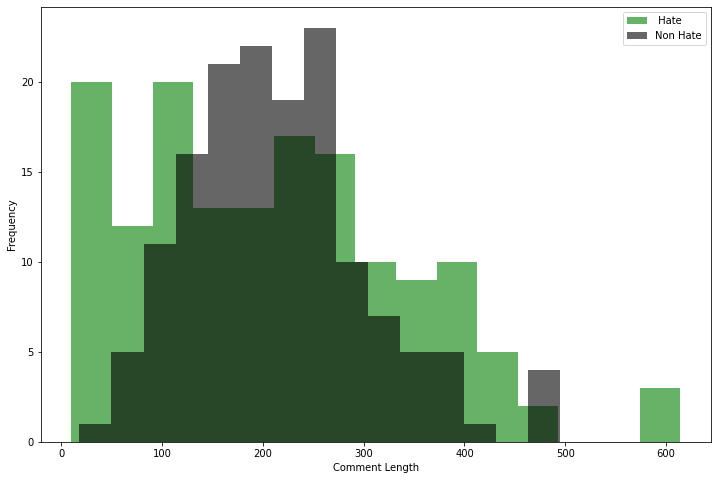

In [23]:
plt.figure(figsize=(12, 8))

df[df.Label == 1].word_counts.plot(kind='hist', color='green', 
                                       label=' Hate',bins=15, alpha=0.6)
df[df.Label==0].word_counts.plot(bins=15, kind='hist', color='black', 
                                       label='Non Hate', alpha=0.6)

plt.legend()
plt.xlabel("Comment Length")
plt.show()

<AxesSubplot:>

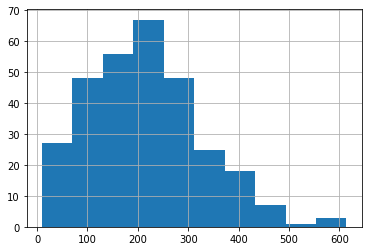

In [9]:
df.word_counts.hist()

### Preprocessing - Text cleaning

In [10]:
def clean_text(df):
    all_comments = list()
    lines = df.Speech.values.tolist()
    for text in lines:

        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        # removing #mentions
        text = re.sub(r"@+","", text)
        
        text = re.sub(r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।ঃ\t\n]", "", text) # removing punctuations
        tokens = word_tokenize(text)
        
        stop_words = set(stopwords.words("bengali"))
        words = [w for w in tokens if not w in stop_words] # removing stop words

        words = ' '.join(words)
        all_comments.append(words)
        
    return all_comments

all_comments = clean_text(df)

In [11]:
df['process_speech'] = all_comments

In [12]:
df

,Serial,Youtube_ID,Speech,Label,word_counts,process_speech
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,594,রাত BNP রা গালাগালি দেতাসে এক Facebook থাকতেও ...
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,190,জীবনের মুক্তি চাইতেছে বাইরে আসো কথাবার্তা পরিম...
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,105,আচ্ছা একদম পাগল নির্লজ্জ বেহায়া ছোটলোক বাজদার...
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,155,পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা কাপড় ধ...
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,614,সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর তুই...
...,...,...,...,...,...,...
295,296,https://www.youtube.com/watch?v=LmXEuMO85c0,আমি আজকে মদ খাচ্ছি কচিনা আমার দাঁত নাই ক্যান? ...,1,39,আজকে মদ খাচ্ছি কচিনা দাঁত ক্যান ছেলে কই বউ কই ...
296,297,https://www.youtube.com/watch?v=ESOQsNTYekE,তোর ফটকি তুই মার. তাই আছে এখানে. রাজাকারের শ্র...,1,24,তোর ফটকি তুই মার রাজাকারের শ্রোতা মূর্খের ড্রা...
297,298,https://www.youtube.com/watch?v=k4myt9Mg_5c,"পাপিয়াকে ছাইড়া দাও, পাপিয়া সাপ, সবার কথা বল...",1,344,পাপিয়াকে ছাইড়া দাও পাপিয়া সাপ কথা দিবে পাপি...
298,299,https://www.youtube.com/watch?v=dj5dCarg6R4,"আরে বাঁদর মাগী এতক্ষণ বড়াইলি দৌড়াই দিস, তোর ...",1,266,আরে বাঁদর মাগী এতক্ষণ বড়াইলি দৌড়াই দিস তোর ক...


In [13]:
df.isnull().sum()

Serial            0
Youtube_ID        0
Speech            0
Label             0
word_counts       0
process_speech    0
dtype: int64

- There are no missing values

In [14]:
X = df.process_speech
Y = df.Label.values

- Now, we will split our 

In [15]:
X.shape[0]

300

### Before we Build our models we have to convert our Text Data into numbers
- Their are couple of ways to convert text such as `One Hot vector`, `Bag of Words`, `TF-IDF`we will use `Tf-IDF`

In [16]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(min_df=5, ngram_range=(1,2))
X = tfidf_v.fit_transform(X).toarray()

- `ngram_range` is basically how many word we will consider along with our target word
    like `My Name is` will represent like this :  `(My, My Name)`, `(name, name is)` This is called bigram
- `min_df` : we will consider words with frequency of 5 in dataset otherwise we will not considere.

In [17]:
validation_split = 0.3

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

num_validation_samples = int(validation_split * X.shape[0]) # 0.3 * 300

X_train = X[:-num_validation_samples]
y_train = Y[:-num_validation_samples]
X_test = X[-num_validation_samples:]
y_test = Y[-num_validation_samples:]

#### We will take couple of Machine Learning Models to see which one gives the best score

In [18]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
# All of our models in a dictionary

models = {"Multinoimal NB": MultinomialNB(),
          "Linear SVC": LinearSVC(), 
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    np.random.seed(47)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
models_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

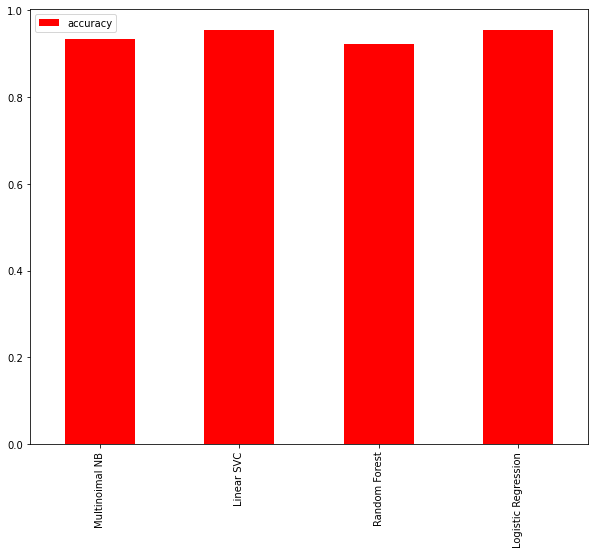

In [24]:
model_compare = pd.DataFrame(models_scores, index=['accuracy'])
model_compare.T.plot(kind="bar", 
                     figsize=(10,8),color='red');

In [22]:
model_compare

,Multinoimal NB,Linear SVC,Random Forest,Logistic Regression
accuracy,0.933333,0.955556,0.922222,0.955556
